In [9]:
import pandas as pd
df=pd.read_csv("cancer.csv",sep=",")
df


FileNotFoundError: [Errno 2] No such file or directory: 'cancer.csv'

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [116]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [117]:
df.shape

(309, 16)

In [118]:
df.LUNG_CANCER.value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [119]:
#grap features and label from dataframe
x = df[['SMOKING','AGE']].values
y = df['LUNG_CANCER'].values

print(x.shape)
print(y.shape)

(309, 2)
(309,)


<Figure size 1000x600 with 0 Axes>

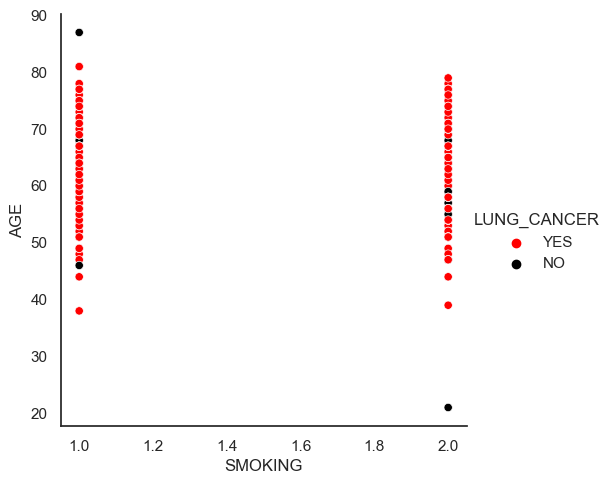

In [120]:
#visualization
plt.figure(figsize=(10,6))


sns.set_style('white')


sns.relplot(x='SMOKING',y='AGE',data=df,
           hue='LUNG_CANCER',
           palette=[ 'red' ,'black']);

%matplotlib inline



In [121]:
class LogisticRegression:
    
    def __init__(self,l_rate = 0.001, iterations = 1000):  # assign values for hyper parameters
        self.l_rate = l_rate                                    #learning rate
        self.iterations = iterations                            # number of iterations
    
    
    def fit(self, x, y):                                      # training for data using Gradient descent
        self.losses = []
        self.theta = np.zeros((1 + x.shape[1]))
        n = x.shape[0]                                          #number of training
        
        for i in range(self.iterations):
            #step1
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  # hypothize h(x)
            z = y_pred
            #step2
            g_z = 1/( 1 + np.e**(-z))                           # map predicted values to prpbability between 0&1
            
            #step3
            cost = (-y * np.log(g_z) - (1 - y) * np.log(1 -g_z)) / n       # error function
            self.losses.append(cost)                                      # tracing losses
             
            #step4    
            d_theta1 = (1/n) * np.dot(x.T,(g_z - y))
            d_theta0 = (1/n) * np.sum (g_z - y)
            
            
            #step5
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1      # updating values of theta
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0         # updating values of theta 0
        return self
    
    
    def predict(self,x):
        y_pred = self.theta[0] + np.dot(x,self.theta[1:])
        z = y_pred
        g_z = 1 / (1 + np.e**(-z))
        return [YES if i > 0.5 else NO for i in g_z]
    
    def

In [122]:
#features scaling using z-score
def scale (x):
    x_scaled = x - np.mean(x, axis = 0)
    x_scaled = x_scaled /np.std(x_scaled, axis=0)
    return x_scaled

    x_LC=scale(x)
    model=LogisticRegression()
    model.fit(x_LC, y)

In [4]:
print("theta_0=",model.theta[0])
print("theta_1=",model.theta[1])
print("theta_2=",model.theta[2])

NameError: name 'model' is not defined

In [3]:
y_pred = model.predict(x_Lc)

NameError: name 'model' is not defined

In [5]:
#compute confusion matrix
CM = confusion_matrix(y_pred,y , labels=[1,0])
print ('Confusion Matrix is : \n , CM')

NameError: name 'confusion_matrix' is not defined

In [6]:
TP=CM[NO][NO]
FP=CM[NO][YES]
FN=CM[YES][NO]
TN=CM[YES][YES]

NameError: name 'CM' is not defined

In [7]:
ACC = (TP + TN) / (TP+TN+FP+FN)
print('Accurancy is : \n' , ACC)
print('-----------------------------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n' , Rec)
print('------------------------------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n' , Prec)
print('------------------------------------------------------')
F1 = 2 * ((Prec * Rec )/(Prec + Rec)) 
print('F1 score is : \n' ,F1)
print('-------------------------------------------------------')

NameError: name 'TP' is not defined